##### Copyright 2018 The TensorFlow Authors.

In [1]:
Dataset: (x,y) = {(1,1), (2,2), (3,2), (4,5)}
Model: y = θ₀ + θ₁ x

**Model θ = (1, 0):**
- Predictions: [1.0, 1.0, 1.0, 1.0]
- Residuals (y - ŷ): [0.0, 1.0, 1.0, 4.0]
- Squared residuals: [0.0, 1.0, 1.0, 16.0]
- **MSE:** 4.5000

**Model θ = (0.5, 1):**
- Predictions: [1.5, 2.5, 3.5, 4.5]
- Residuals (y - ŷ): [-0.5, -0.5, -1.5, 0.5]
- Squared residuals: [0.25, 0.25, 2.25, 0.25]
- **MSE:** 0.7500

**Better fit:** θ=(0.5, 1) has lower MSE (0.7500 vs 4.5000).

SyntaxError: invalid character '₀' (U+2080) (ipython-input-1278920365.py, line 2)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/plots/data_and_fits.png'

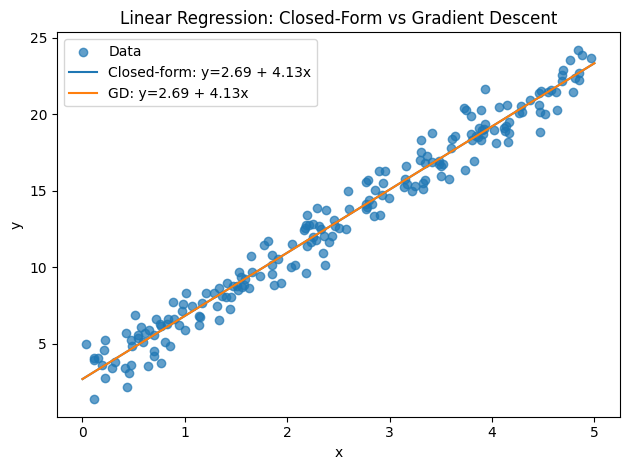

In [2]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

# 1) Generate synthetic data
n = 200
x = rng.uniform(0.0, 5.0, size=n)
epsilon = rng.normal(0.0, 1.0, size=n)  # Gaussian noise, std=1
y = 3.0 + 4.0 * x + epsilon

# Build design matrix with bias term (column of 1s)
X = np.column_stack([np.ones_like(x), x])

# 2) Closed-form (Normal Equation)
# theta_cf = (X^T X)^-1 X^T y
XtX = X.T @ X
Xty = X.T @ y
theta_cf = np.linalg.inv(XtX) @ Xty
intercept_cf, slope_cf = theta_cf

# Predictions for plotting
x_line = np.linspace(0, 5, 100)
X_line = np.column_stack([np.ones_like(x_line), x_line])
y_line_cf = X_line @ theta_cf

# 3) Gradient Descent
eta = 0.05
iters = 1000
theta_gd = np.array([0.0, 0.0])
losses = []

def mse(theta, X, y):
    y_pred = X @ theta
    return np.mean((y - y_pred) ** 2)

for t in range(iters):
    y_pred = X @ theta_gd
    residuals = y - y_pred
    # gradient of MSE wrt theta: -(2/m) X^T residuals
    grad = -(2.0 / len(y)) * (X.T @ residuals)
    theta_gd = theta_gd - eta * grad
    losses.append(mse(theta_gd, X, y))

intercept_gd, slope_gd = theta_gd
y_line_gd = X_line @ theta_gd

# 4) Plots
# Plot 1: raw data + closed-form line + gradient descent line
plt.figure()
plt.scatter(x, y, label="Data", alpha=0.7)
plt.plot(x_line, y_line_cf, label=f"Closed-form: y={intercept_cf:.2f} + {slope_cf:.2f}x")
plt.plot(x_line, y_line_gd, label=f"GD: y={intercept_gd:.2f} + {slope_gd:.2f}x")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression: Closed-Form vs Gradient Descent")
plt.legend()
plt.tight_layout()
plt.savefig("/mnt/data/plots/data_and_fits.png", dpi=160)

# Plot 2: Loss curve
plt.figure()
plt.plot(range(1, iters+1), losses)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Gradient Descent Loss Curve")
plt.tight_layout()
plt.savefig("/mnt/data/plots/loss_curve.png", dpi=160)

# Print final parameters
print("Closed-form solution: intercept={:.6f}, slope={:.6f}".format(intercept_cf, slope_cf))
print("Gradient Descent:     intercept={:.6f}, slope={:.6f}".format(intercept_gd, slope_gd))
print("Difference (abs):     intercept={:.6f}, slope={:.6f}".format(abs(intercept_cf-intercept_gd), abs(slope_cf-slope_gd)))


In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## **Introduction to Colab and Python**

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

Welcome to this Colab where you will get a quick introduction to the Python programming language and the environment used for the course's exercises: Colab.

Colab is a Python development environment that runs in the browser using Google Cloud.

For example, to print "Hello World", just hover the mouse over [ ] and press the play button to the upper left. Or press shift-enter to execute.

In [ ]:
print("Hello World")

## Functions, Conditionals, and Iteration
Let's create a Python function, and call it from a loop.

In [ ]:
def HelloWorldXY(x, y):
  if (x < 10):
    print("Hello World, x was < 10")
  elif (x < 20):
    print("Hello World, x was >= 10 but < 20")
  else:
    print("Hello World, x was >= 20")
  return x + y

for i in range(8, 25, 5):  # i=8, 13, 18, 23 (start, stop, step)
  print("--- Now running with i: {}".format(i))
  r = HelloWorldXY(i,i)
  print("Result from HelloWorld: {}".format(r))

In [ ]:
print(HelloWorldXY(1,2))

Easy, right?

If you want a loop starting at 0 to 2 (exclusive) you could do any of the following

In [ ]:
print("Iterate over the items. `range(2)` is like a list [0,1].")
for i in range(2):
  print(i)

print("Iterate over an actual list.")
for i in [0,1]:
  print(i)

print("While works")
i = 0
while i < 2:
  print(i)
  i += 1

In [ ]:
print("Python supports standard key words like continue and break")
while True:
  print("Entered while")
  break

## Numpy and lists
Python has lists built into the language.
However, we will use a library called numpy for this.
Numpy gives you lots of support functions that are useful when doing Machine Learning.

Here, you will also see an import statement. This statement makes the entire numpy package available and we can access those symbols using the abbreviated 'np' syntax.

In [ ]:
import numpy as np  # Make numpy available using np.

# Create a numpy array, and append an element
a = np.array(["Hello", "World"])
a = np.append(a, "!")
print("Current array: {}".format(a))
print("Printing each element")
for i in a:
  print(i)

print("\nPrinting each element and their index")
for i,e in enumerate(a):
  print("Index: {}, was: {}".format(i, e))

In [ ]:
print("\nShowing some basic math on arrays")
b = np.array([0,1,4,3,2])
print("Max: {}".format(np.max(b)))
print("Average: {}".format(np.average(b)))
print("Max index: {}".format(np.argmax(b)))

In [ ]:
print("\nYou can print the type of anything")
print("Type of b: {}, type of b[0]: {}".format(type(b), type(b[0])))

In [ ]:
print("\nUse numpy to create a [3,3] dimension array with random number")
c = np.random.rand(3, 3)
print(c)

In [ ]:
print("\nYou can print the dimensions of arrays")
print("Shape of a: {}".format(a.shape))
print("Shape of b: {}".format(b.shape))
print("Shape of c: {}".format(c.shape))
print("...Observe, Python uses both [0,1,2] and (0,1,2) to specify lists")

## Colab Specifics

Colab is a virtual machine you can access directly. To run commands at the VM's terminal, prefix the line with an exclamation point (!).


In [ ]:
print("\nDoing $ls on filesystem")
!ls -l
!pwd

In [ ]:
print("Install numpy")  # Just for test, numpy is actually preinstalled in all Colab instances
!pip install numpy

**Exercise**

Create a code cell underneath this text cell and add code to:


*   List the path of the current directory (pwd)
* Go to / (cd) and list the content (ls -l)

In [ ]:
!pwd
!cd /
!ls -l
print("Hello")

All usage of Colab in this course is completely free or charge. Even GPU usage is provided free of charge for some hours of usage every day.

**Using GPUs**
* Many of the exercises in the course executes more quickly by using GPU runtime: Runtime | Change runtime type | Hardware accelerator | GPU

**Some final words on Colab**
*   You execute each cell in order, you can edit & re-execute cells if you want
*   Sometimes, this could have unintended consequences. For example, if you add a dimension to an array and execute the cell multiple times, then the cells after may not work. If you encounter problem reset your environment:
  *   Runtime -> Restart runtime... Resets your Python shell
  *   Runtime -> Restart all runtimes... Will reset the Colab image, and get you back to a 100% clean environment
* You can also clear the output in the Colab by doing: Edit -> Clear all outputs
* Colabs in this course are loaded from GitHub. Save to your Google Drive if you want a copy with your code/output: File -> Save a copy in Drive...

**Learn More**
*   Check out [this](https://www.youtube.com/watch?v=inN8seMm7UI&list=PLQY2H8rRoyvwLbzbnKJ59NkZvQAW9wLbx&index=3) episode of #CodingTensorFlow, and don't forget to subscribe to the YouTube channel ;)
